In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
n = 200

x = np.zeros((n, 1))
V = np.zeros((n, 1))
z = np.zeros((n, 1))

x[0] = 5
V[0] = 1
T = 1

sigma_a_2 = 0.2 ** 2
sigma_eta_2 = 20 **2
a = np.random.normal(0, np.sqrt(sigma_a_2), n-1)
et = np.random.normal(0, np.sqrt(sigma_eta_2), n)

for i in range(n):
    x[i] = x[i-1]+V[i-1]*T + ((a[i-1]*T)**2)/2
    V[i] = V[i-1] + a[i-1]*T
    z[i] = x[i]+et[i]

In [3]:
phi = np.array([[1, T], [0, 1]])
G = np.array([[(T**2)/2],[T]])
H = np.array([1, 0])
Z = np.zeros((2, n))
X = np.array([[5], [1]])

X_ = X

for i in range(1, len(a)+1):
    X = np.hstack((X, phi.dot(X_) + G * a[i - 1]))
    X_ = phi.dot(X_)+G*a[i-1]

In [4]:
Q = G*np.transpose(G)*sigma_a_2

R=sigma_eta_2

P_1 = np.zeros((2, 2, n))
X_1 = np.zeros((2, n))

P_ = np.zeros((2, 2, n))
P_[:,:,0] = [[10000,0],[0,10000]]

X_ = np.zeros((2,n))
X_[:,0] = [2,0]

HT = H.T
K = np.zeros((2, n))
I = np.eye(2)

for i in range(1, n):
    P_1[:, :, i] = (phi.dot(P_[:, :, i - 1])).dot(np.transpose(phi)) + Q
    
    X_1[:,i] = phi.dot((X_[:, i - 1].reshape(2, 1)).reshape(2))
    K[:,i] = (P_1[:,:,i].dot(HT))/ ((H.dot(P_1[:,:,i])).dot(HT)+R)
    
    X_[:,i] = X_1[:,i]+K[:,i]*(z[i] - H.dot(X_1[:,i]))
    P_[:,:,i] = (I - K[:, i].reshape(2, 1) * H).dot(P_1[:, :, i])
    
K = np.delete(K, 0, axis = 1)

In [21]:
X_back = np.zeros((2, n))
X_back[:, -1] = X_[:, -1]
P_back = np.zeros((2, 2, n))
P_back[:, :, -1] = P_[:, :, -1]
A_back = np.zeros((2, 2, n))

for i in reversed(range(n - 1)):
    A_back[:, :, i] = P_[:, :, i].dot(phi.T).dot(np.linalg.inv(P_1[:, :, i + 1]))
    X_back[:, i] = X_[:, i] + A_back[:, :, i].dot(X_back[:, i + 1] - phi.dot(X_[:, i]))
    P_back[:, :, i] = P_[:, :, i] + A_back[:, :, i].dot(P_back[:, :, i + 1] - P_1[:, :, i + 1]).dot(A_back[:, :, i].T)

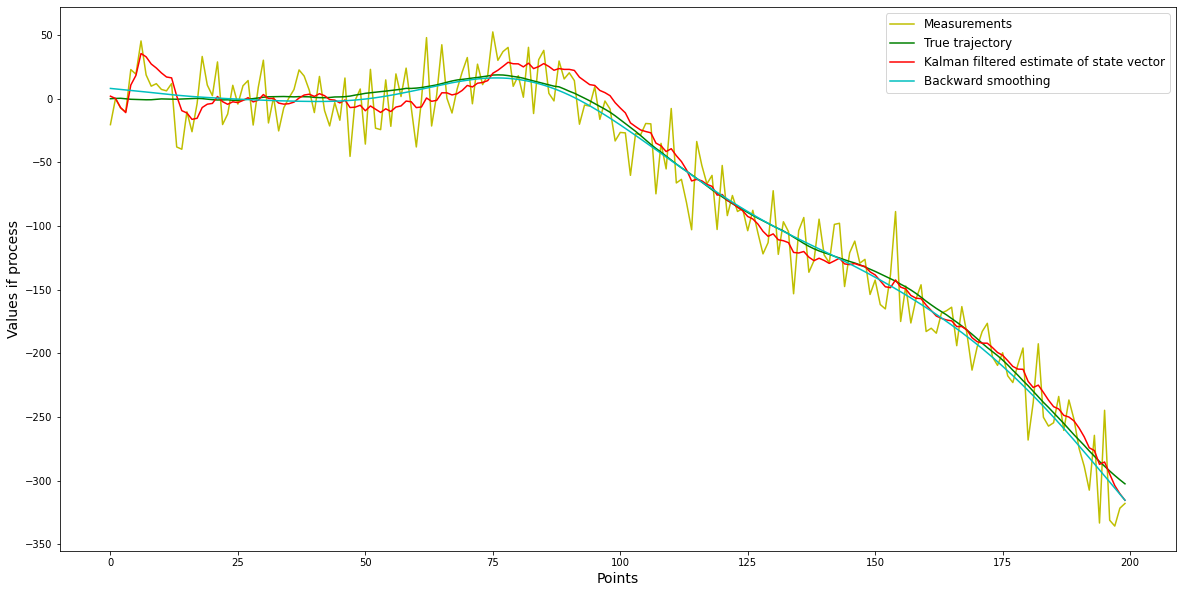

In [22]:
fig, ax = plt.subplots(figsize = (20,10))
ax.set_ylabel('Values if process', fontsize = 14)
ax.set_xlabel('Points', fontsize = 14)
ax.plot(z, label = "Measurements", color = "y")
ax.plot(x, label = "True trajectory", color = "g")
ax.plot(X_[0,:], label = "Kalman filtered estimate of state vector", color = "r")
ax.plot(X_back[0,:], label = "Backward smoothing", color = "c")
plt.legend(fontsize = 12)

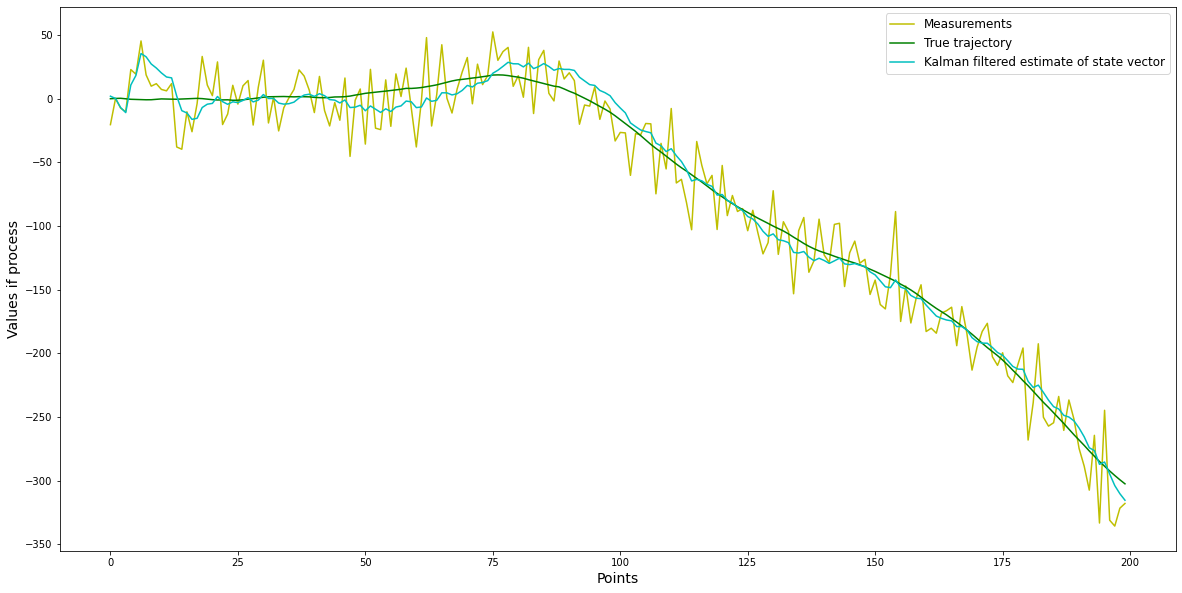

In [7]:
fig, ax = plt.subplots(figsize = (20,10))
ax.set_ylabel('Values if process', fontsize = 14)
ax.set_xlabel('Points', fontsize = 14)
ax.plot(z, label = "Measurements", color = "y")
ax.plot(x, label = "True trajectory", color = "g")
ax.plot(X_[0,:], label = "Kalman filtered estimate of state vector", color = "c")
plt.legend(fontsize = 12)

In [8]:
fexp = np.zeros((1, n))
fexp[0,0] = X_[0,0]
alpha = 0.35

for i in range(1,n):
    fexp[0,i] = fexp[0, i-1] + alpha * (X_[0,i] - fexp[0, i-1])  

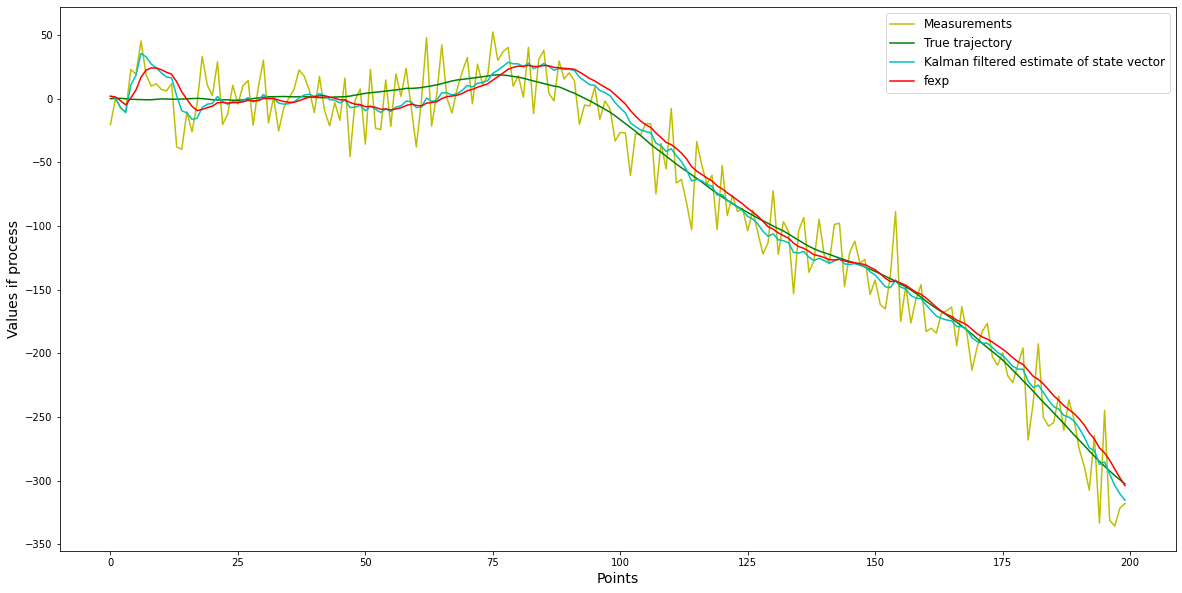

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
ax.set_ylabel('Values if process', fontsize = 14)
ax.set_xlabel('Points', fontsize = 14)
ax.plot(z, label = "Measurements", color = "y")
ax.plot(x, label = "True trajectory", color = "g")
ax.plot(X_[0,:], label = "Kalman filtered estimate of state vector", color = "c")
ax.plot(fexp[0,:], label = "fexp", color = "r")
plt.legend(fontsize = 12)

In [10]:
bexp = np.zeros((1,n))
bexp[-1,:] = fexp[-1,:]

for i in range(1, n):
    bexp[:,n-i-1] = bexp[:,n-i] + alpha*(fexp[:,n-i-1] - bexp[:,n-i])

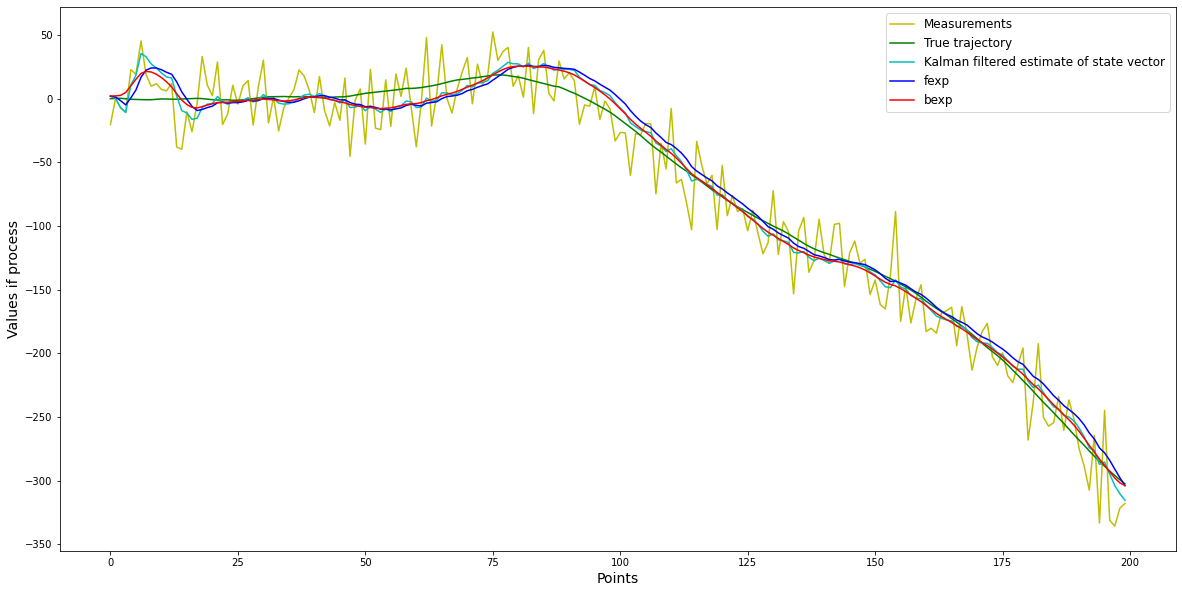

In [11]:
fig, ax = plt.subplots(figsize = (20,10))
ax.set_ylabel('Values if process', fontsize = 14)
ax.set_xlabel('Points', fontsize = 14)
ax.plot(z, label = "Measurements", color = "y")
ax.plot(x, label = "True trajectory", color = "g")
ax.plot(X_[0,:], label = "Kalman filtered estimate of state vector", color = "c")
ax.plot(fexp[0,:], label = "fexp", color = "b")
ax.plot(bexp[0,:], label = "bexp", color = "r")
plt.legend(fontsize = 12)

In [28]:
M = 500
N = 200

Error12 = np.zeros((2, N, M))

for k in range(M):
        # Initialization of arrays
    x12 = np.zeros((N, 1))
    V12 = np.zeros((N, 1))
    z12 = np.zeros((N, 1))

    x12[0] = 5
    V12[0] = 1
    T12 = 1

    # Variances
    sigma_a_2 = 0.2 ** 2
    sigma_eta_2 = 20 ** 2
    
    Error_filt = np.zeros((2,N,M))
    Error_smoothed = np.zeros((2,N,M))

    # Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
    a12 = np.random.normal(0, np.sqrt(sigma_a_2), N - 1)
    eta12 = np.random.normal(0, np.sqrt(sigma_eta_2), N)

    # Generation of V=arrays
    for i in range(1, len(V12)):
        V12[i] = V12[i - 1] + a12[i - 1] * T12
        x12[i] = x12[i - 1] + V12[i - 1] * T12 + a12[i - 1] * (T12 ** 2) / 2
        z12[i] = x12[i] + eta12[i]

    #Transition matrix    
    phi12 = np.array([[1, T12], [0, 1]])
    #Input matrix
    G12 = np.array([[(T12 ** 2) / 2], [T12]])
    #Observation matrix
    H12 = np.array([1, 0])
    #Measurement of coordinate
    Z12 = np.zeros((2, N))
    #State vector
    X12 = np.array([[5], [1]])

    X12_ = X12
    # Generation of true trajectory X
    for i in range(1, len(a12) + 1):
        X12 = np.hstack((X12, phi12.dot(X12_) + G12 * a12[i - 1]))
        X12_ = phi12.dot(X12_) + G12 * a12[i - 1]
    
    #Covariance matrix Q of state noise
    Q12 = G12 * G12.T * sigma_a_2
    #Covariance matrix R of measurements noise
    R12 = sigma_eta_2

    #Prediction error covariance matrix
    P12_1 = np.zeros((2, 2, N))
    X12_1 = np.zeros((2, N))
    
    #Filtration error covariance matrix
    P12_ = np.zeros((2, 2, N))
    P12_[:, :, 0] = [[1000, 0], [0, 1000]]
    #Improved estimate
    X12_ = np.zeros((2, n))
    X12_[:, 0] = [2, 0]

    HT12 = H12.T
    #Filter gain, weight of residual
    K12 = np.zeros((2, N))
    I12 = np.eye(2)

    for i in range(1, N):
        P12_1[:, :, i] = (phi12.dot(P12_[:, :, i - 1])).dot(phi12.T) + Q12

        X12_1[:, i] = phi12.dot(X12_[:, i - 1].reshape(2, 1)).reshape(2)
        K12[:, i] = ((P12_1[:, :, i].dot(HT12)) / ((H12.dot(P12_1[:, :, i])).dot(HT12) + R12)).reshape(2)

        X12_[:, i] = X12_1[:, i] + K12[:, i] * (z[i] - H12.dot(X12_1[:, i]))
        P12_[:, :, i] = (I12 - K12[:, i].reshape(2, 1) * H12).dot(P12_1[:, :, i])

    K12 = np.delete(K12, 0, axis = 1)
    A12 = np.zeros((2, 2, N))
    Xb12_ = np.zeros((2,N))
    Xb12_[:,-1] = X12_[:,-1]
    Pb12_ = np.zeros((2,2,N))
    Pb12_[:,:,-1] = P12_[:,:,-1]
    for k in reversed(range(n-1)):
        A12[:, :, k] = P12_[:,:,k].dot(phi.T).dot((np.linalg.inv(P12_[:, :, k+1])))
        Xb12_[:, k] = X12_[:,k] + A12[:, :, k].dot(X12_[:,k+1] - phi.dot(X12_[:,k]))
        Pb12_[:, :, k] = P12_[:, :, k] + A12[:, :, k].dot(Pb12_[:, :, k-1] - P12_1[:, :, k]).dot(A12[:, :, k].T)
    
    Error_filt[:,:,k] = (X12_1 - X12_)**2
    Error_smoothed[:,:,k] = (X12_1 - Xb12_)**2

In [29]:
Final_err_filt = np.sqrt(np.sum(Error_filt, axis = 2)/(M-1))
Final_err_smoothed = np.sqrt(np.sum(Error_smoothed, axis = 2)/(M-1))

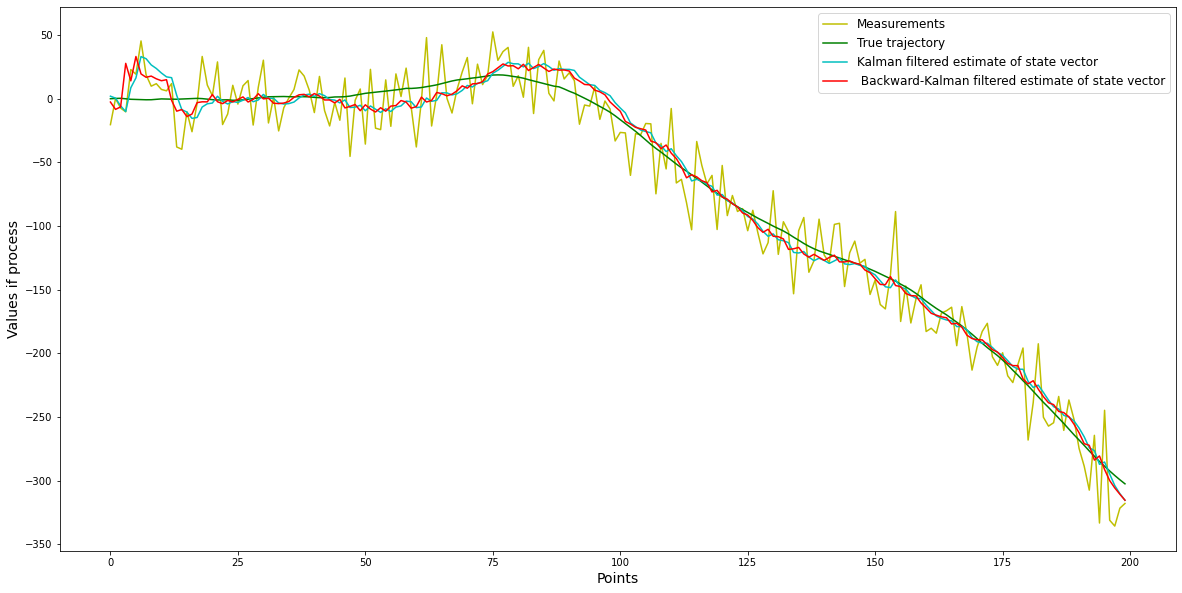

In [32]:
fig, ax = plt.subplots(figsize = (20,10))
ax.set_ylabel('Values if process', fontsize = 14)
ax.set_xlabel('Points', fontsize = 14)
ax.plot(z, label = "Measurements", color = "y")
ax.plot(x, label = "True trajectory", color = "g")
ax.plot(X12_[0,:], label = "Kalman filtered estimate of state vector", color = "c")
ax.plot(Xb12_[0,:], label = " Backward-Kalman filtered estimate of state vector", color = "r")
plt.legend(fontsize = 12)

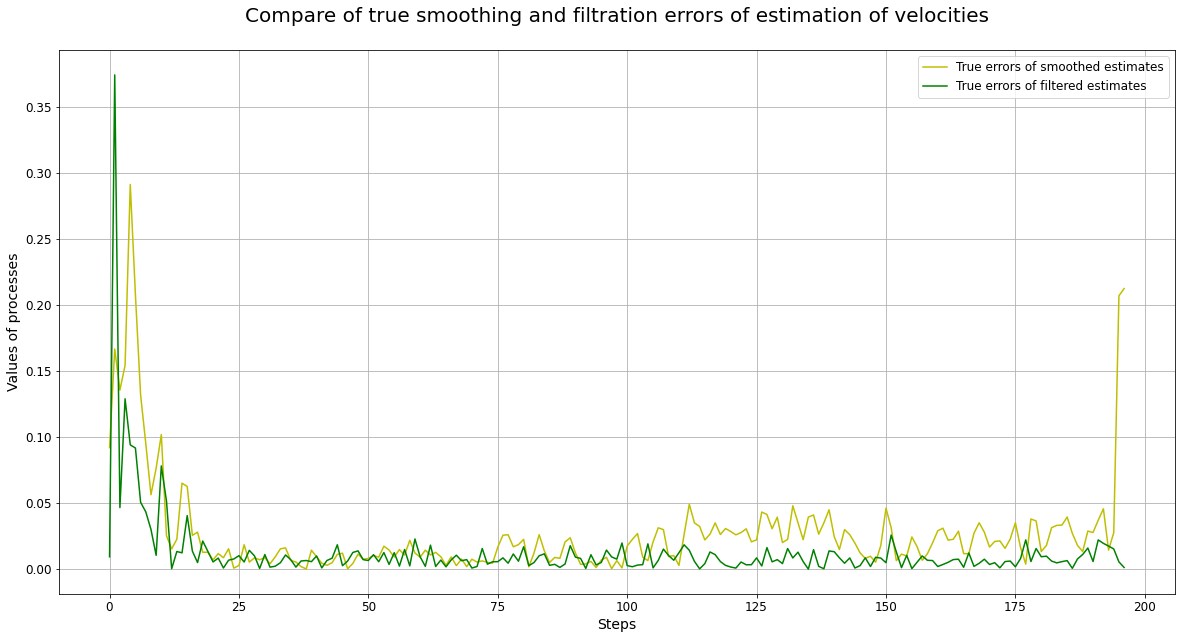

In [15]:
fig, e = plt.subplots(figsize=(20,10))
e.set_title("Compare of true smoothing and filtration errors of estimation of velocities\n", fontsize = 20)
e.set_xlabel("Steps", fontsize = 14)
e.set_ylabel("Values of processes", fontsize = 14)
e.plot(Final_err_smoothed[1,3:], label = "True errors of smoothed estimates", color = "y")
e.plot(Final_err_filt[1,3:], label = "True errors of filtered estimates", color = "g")
e.tick_params(labelsize = 12)
e.legend(fontsize = 12)
e.grid()